### MRI Image Reconstruction - An Application of the Fast Fourier and Inverse Fast Fourier Transform Functions

Created by Henry Wang

In [45]:
# Import scientific libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# For 3D Colormap
from matplotlib import cm
from matplotlib.ticker import LinearLocator

### Project Overview 

1) Use NumPy's Fast Fourier Transform functions (np.fft.fft...) on a Gaussian in 1-Dimension to turn the curve into frequencies. Then, using the inverse Fourier transform, reconstruct the original Gaussian. While doing this, play around with the standard deviation constant sigma for the Gaussian. Plot using matplotlib.

2) Do the same thing but on a 2D Gaussian, once again playing with the parameters. Attempt to plot the 2D Gaussian and its 2D frequency domain using a surface in 3D space.

3) Use the inverse Fourier transform on real MRI scan k-space data that contains multiple image “slices” of someone's knee. This should be a similar process to reconstructing the 2D Gaussian from the 2D frequency space. 

### Part 1 - Fourier Transforming a Gaussian in 1D

My goal in part 1 is to define a function that outputs the y-values corresponding to a Gaussian in 1D. I will show the effect of changing the sigma parameter in the function and how the Gaussian looks when it is turned into frequency data depending on the sigma values. Then I will use the inverse Fourier transform to reconstruct the original Gaussian data from the frequency data. 

In [6]:
# Define a function to build a Gaussian from an array of x values
def Gaussian1D(x_arr, sigma):
    '''
    Computes the y values for a 1D Gaussian. Omits normalization parameter.

    Parameters:
    x_arr - x values
    sigma - standard deviation constant around the mean, determines wideness

    Returns the corresponding y-points
    '''

    y_values = np.exp( -(x_arr**2) / (2 * (sigma**2)))

    return y_values

In [7]:
# Parameters to pass into 1D Guassian function
x_values = np.linspace(-2, 2, 200)
sigmas = [0.5, 0.2, 0.05]

# Color array for plotting
colors = ['green', 'blue', 'red']

In [8]:
# Generate Data using a for loop to create y values for each sigma
y_data = [Gaussian1D(x_values, sigma) for sigma in sigmas]

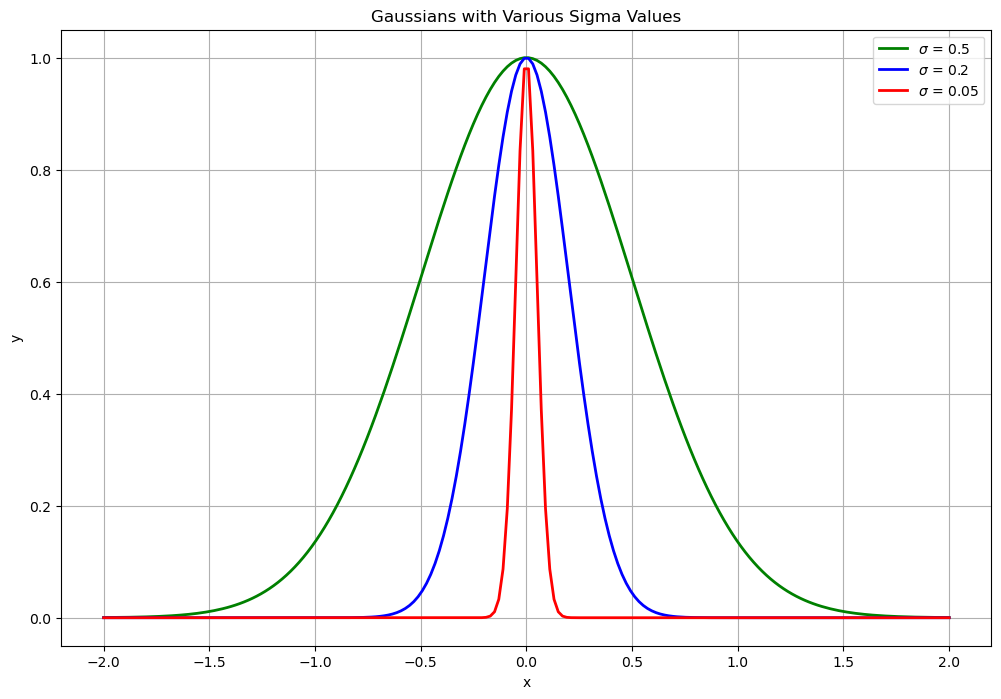

In [9]:
# Plot the Gaussian
fig, gauss1 = plt.subplots(1, figsize=(12,8))

for y, color, sigma in zip(y_data, colors, sigmas):
    gauss1.plot(x_values, y, color = color, label = f'$\sigma$ = {sigma}', linewidth = 2)

# Style
gauss1.set_title('Gaussians with Various Sigma Values')
gauss1.set_xlabel('x')
gauss1.set_ylabel('y')
gauss1.legend()
gauss1.grid()

plt.show()

**ANALYSIS**\
It appears that as the value of sigma decreases, the narrowness of the Gaussian does as well. This makes intuitive sense because as the standard deviation constant decreases, so does the wideness of the normal distribution.

In [10]:
# Define a function that will help convert the Gaussian into frequency data
def FastFourier1D(y_values):
    '''
    Takes in y_values for the gaussian and outputs the fourier transform in raw and shifted forms.
    The shifted form is better for plotting due to the symmetry it presents.
    '''
    
    ft_raw = np.fft.fft(y_values)
    ft_shifted = np.fft.fftshift(ft_raw)

    return (ft_shifted, ft_raw)

In [11]:
# Generate Data into arrays for the different Gaussians
ft_shifted_data = []
ft_raw_data = []

# Generate Data using a for loop to create y values for each sigma
y_data = [Gaussian1D(x_values, sigma) for sigma in sigmas]

for y in y_data:
    ft_shift_i, ft_raw_i = FastFourier1D(y)
    ft_shifted_data.append(ft_shift_i)
    ft_raw_data.append(ft_raw_i)

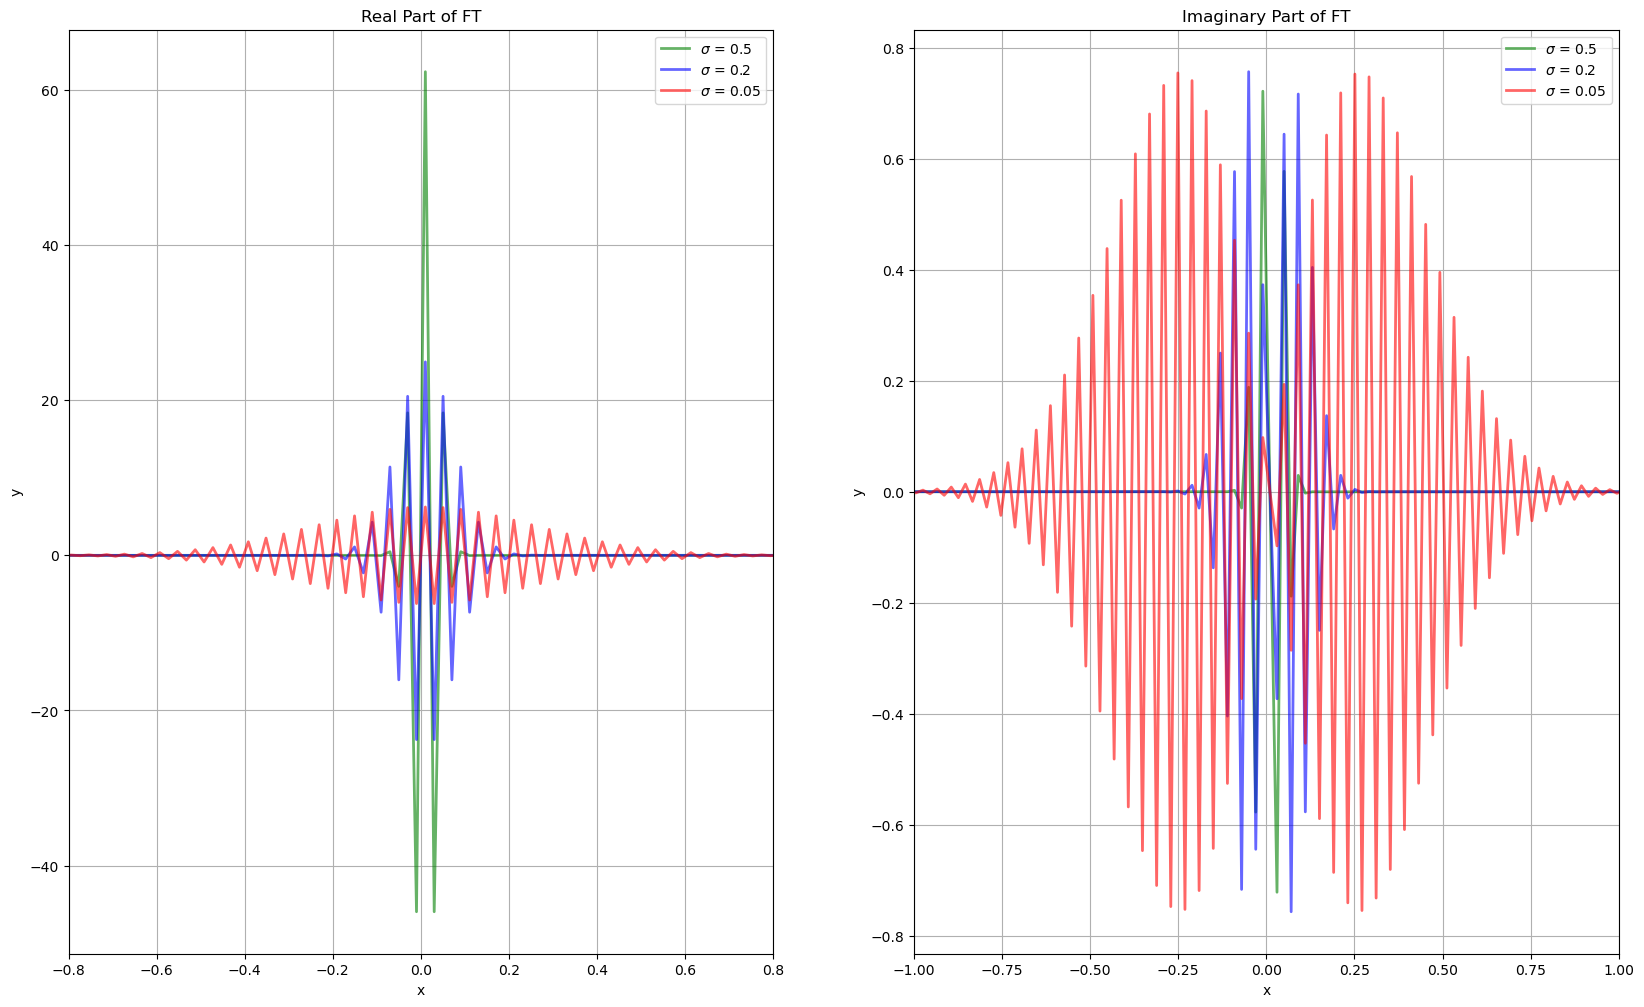

In [12]:
# Create two plots, one for the real and one for the imaginary parts of the Fourier transform
fig, (ft_real, ft_im) = plt.subplots(1, 2, figsize=(20,12))

for ft_shift, color, sigma in zip(ft_shifted_data, colors, sigmas):
    ft_real.plot(x_values, np.real(ft_shift), color = color, label = f'$\sigma$ = {sigma}', linewidth = 2, alpha = 0.6)

for ft_shift, color, sigma in zip(ft_shifted_data, colors, sigmas):
    ft_im.plot(x_values, np.imag(ft_shift), color = color, label = f'$\sigma$ = {sigma}', linewidth = 2, alpha = 0.6)

ft_real.set_xlim(-0.8, 0.8)
ft_im.set_xlim(-1.0, 1.0)

# Labels
ft_real.set_title('Real Part of FT')
ft_real.set_xlabel('x')
ft_real.set_ylabel('y')

ft_im.set_xlabel('x')
ft_im.set_ylabel('y')                   
ft_im.set_title('Imaginary Part of FT')

ft_real.legend()
ft_real.grid()

ft_im.legend()
ft_im.grid()

plt.show()

**ANALYSIS**\
It appears that as sigma decreases, the representation in k-space for the Gaussians gets wider. This also makes sense because as the original function gets narrower and sharper in appearance, more frequencies are needed to "contruct" that Gaussian. This is in line with the uncertainty principle and the fact that the sharper something is in one domain, the wider the representation will be in the other.

In [13]:
# Compute the Inverse Fourier Transform to reconstruct the original Gaussian
inverse_data = [np.fft.ifft(ft_raw_i) for ft_raw_i in ft_raw_data]

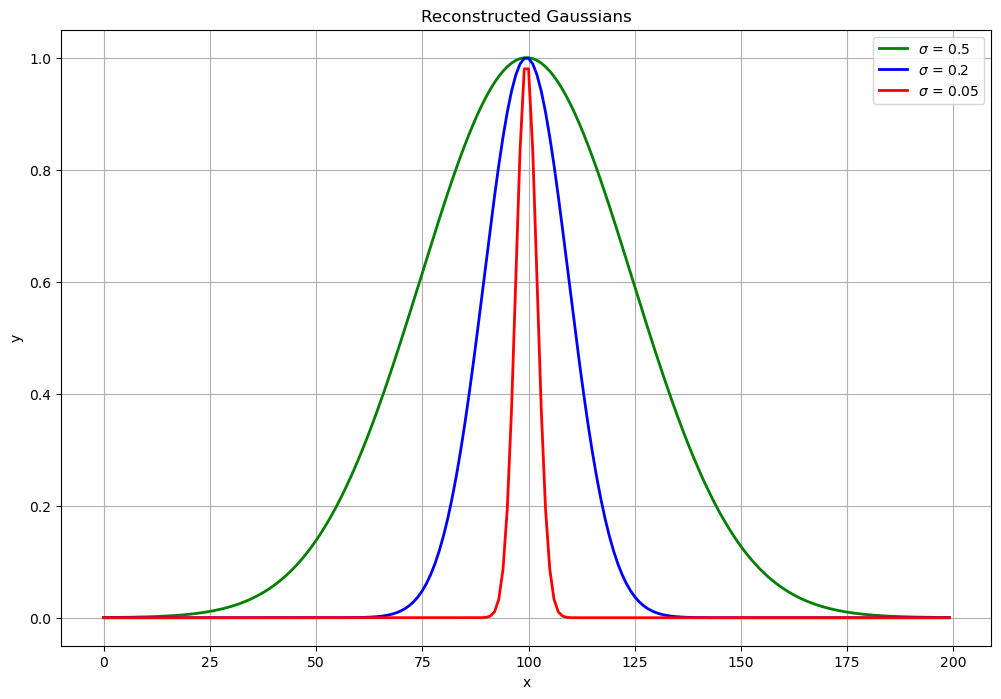

In [14]:
# Plot the reconstructed Gaussians
fig, inverse = plt.subplots(1, figsize=(12,8))

for inverse_i, color_i, sigma_i in zip(inverse_data, colors, sigmas):
    inverse.plot(np.real(inverse_i), color = color_i, label = f'$\sigma$ = {sigma_i}', linewidth = 2)

# Labels
inverse.set_title('Reconstructed Gaussians')
inverse.set_xlabel('x')
inverse.set_ylabel('y')

plt.legend()
plt.grid()

plt.show()

### Part 2 - Fourier Transforms in 2D

Now it's time to do the same thing but with two-dimensional Gaussians. 

In [16]:
# Define a function to build a 2D Gaussian
def Gaussian2D(x_arr, y_arr, sigma_x, sigma_y):
    '''
    Computes the z values for a 2D Gaussian. Omits normalization parameter.

    Parameters:
    x_arr - x values
    y_arr - y values
    sigma_x - standard deviation constant around the mean in the x dimension
    sigma_y - standard deviation constant around the mean in the y dimension

    Returns the corresponding z-points
    '''

    z_values = np.exp(-(((x_arr**2) / (2 * (sigma_x**2))) + ((y_arr**2) / (2 * (sigma_y**2)))))

    return z_values

In [17]:
# Define a function to convert the 2D Gaussian from spatial data to frequency data
def FastFourier2D(z_values):
    '''
    Takes in z_values for the gaussian and outputs the shifted fourier transform and original fft.
    '''
    
    ft_raw = np.fft.fft(z_values)
    shifted_ft = np.fft.fftshift(ft_raw)

    return (shifted_ft, ft_raw)

In [18]:
# Parameters
x_values2D = np.linspace(-2, 2, 200)
y_values2D = np.linspace(-2, 2, 200)

# Use NumPy meshgrid to help with 2D data generation and plotting.
# https://numpy.org/doc/2.1/reference/generated/numpy.meshgrid.html
x_mesh, y_mesh = np.meshgrid(x_values2D, y_values2D)

# Must also now define y-sigmas
x_sigmas = [0.5, 0.2, 0.05]
y_sigmas = [0.5, 0.2, 0.05]

In [19]:
# Generate Data for each set of sigma values in x and y
s1_z_values = Gaussian2D(x_mesh, y_mesh, x_sigmas[0], y_sigmas[0])
s2_z_values = Gaussian2D(x_mesh, y_mesh, x_sigmas[1], y_sigmas[1])
s3_z_values = Gaussian2D(x_mesh, y_mesh, x_sigmas[2], y_sigmas[2])

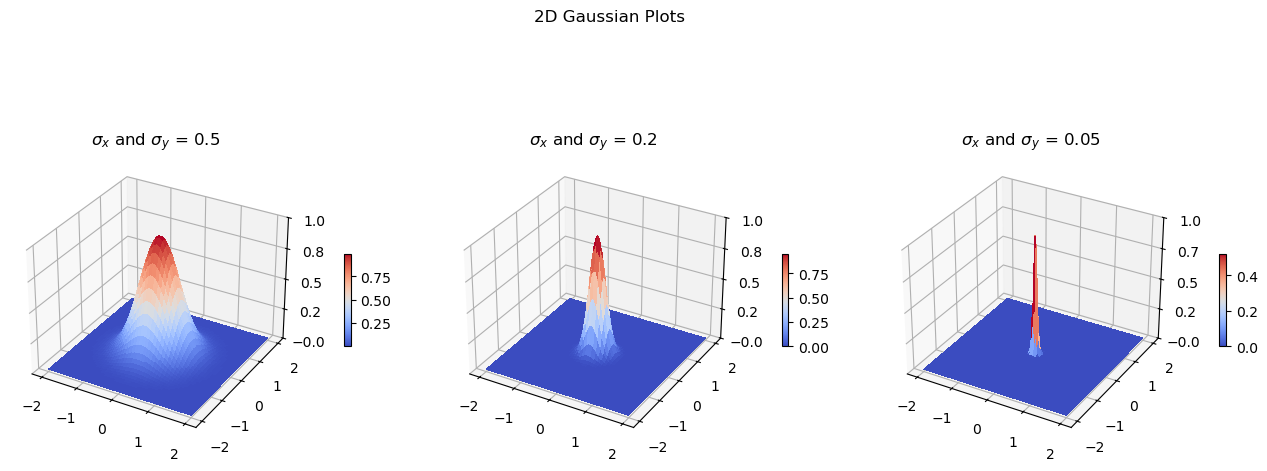

In [20]:
# Part of code borrowed from guide: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py 

# Time for plotting the Guassians in 3D
fig, (s1, s2, s3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize = (16, 6))

# Plot the surface for sigmas = 0.5
surf_s1 = s1.plot_surface(x_mesh, y_mesh, s1_z_values, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s1.set_title("$\sigma_x$ and $\sigma_y$ = 0.5")
s1.zaxis.set_major_locator(LinearLocator(5))
s1.zaxis.set_major_formatter('{x:0.1f}')
#g2.set_zlim(-0.0, 1.0)

# Plot the surface for sigmas = 0.2
surf_s2 = s2.plot_surface(x_mesh, y_mesh, s2_z_values, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s2.set_title("$\sigma_x$ and $\sigma_y$ = 0.2")
s2.zaxis.set_major_locator(LinearLocator(5))
s2.zaxis.set_major_formatter('{x:0.1f}')

# Plot the surface for sigmas = 0.05
surf_s3 = s3.plot_surface(x_mesh, y_mesh, s3_z_values, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s3.set_title("$\sigma_x$ and $\sigma_y$ = 0.05")
s3.zaxis.set_major_locator(LinearLocator(5))
s3.zaxis.set_major_formatter('{x:0.1f}')

# Add color bars which maps values to colors
fig.colorbar(surf_s1, ax = s1, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s2, ax = s2, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s3, ax = s3, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))

# Title
fig.suptitle('2D Gaussian Plots')

plt.show()

**Analysis**:
It appears that as you decrease sigma for both x and y, the Gaussian appears narrower in both the x and y dimensions. This is consistent with the 1D Gaussian sigma decreasing and represents a smaller standard deviation with a smaller sigma as expected.

#### Now use the Fast Fourier Transform on the 2D Gaussians

In [21]:
# Define a function to convert the 2D Gaussians into frequency data
def FastFourier2D(z_values):
    '''
    Takes in z_values for the 2D Gaussian and outputs the fourier transform in raw and shifted forms.

    Parameters:
    z_values - the coordinate array for the nomral distribution or bell curve of the 2D Gaussian.
    '''
    
    fft2_raw = np.fft.fft2(z_values)
    fft2_shifted = np.fft.fftshift(fft2_raw)

    return (fft2_raw, fft2_shifted)

In [22]:
# Parameters
x_values2D = np.linspace(-2, 2, 200)
y_values2D = np.linspace(-2, 2, 200)
x_mesh, y_mesh = np.meshgrid(x_values2D, y_values2D)

x_sigmas = [0.5, 0.2, 0.05]
y_sigmas = [0.5, 0.2, 0.05]

s1_z_values = Gaussian2D(x_mesh, y_mesh, x_sigmas[0], y_sigmas[0])
s2_z_values = Gaussian2D(x_mesh, y_mesh, x_sigmas[1], y_sigmas[1])
s3_z_values = Gaussian2D(x_mesh, y_mesh, x_sigmas[2], y_sigmas[2])

In [23]:
# Generate Data
(s1_raw, s1_shift) = FastFourier2D(s1_z_values)
(s2_raw, s2_shift) = FastFourier2D(s2_z_values)
(s3_raw, s3_shift) = FastFourier2D(s3_z_values)

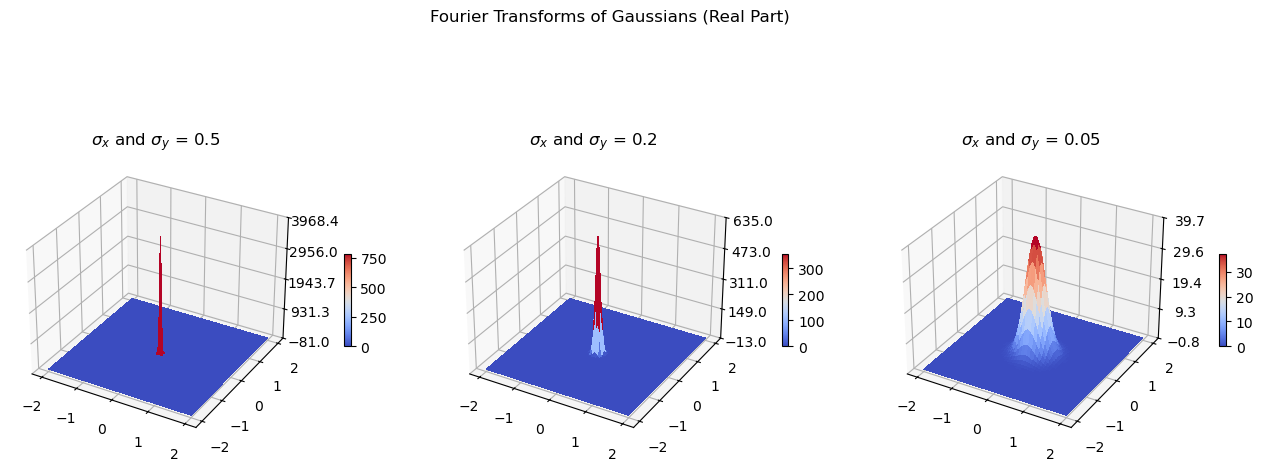

In [24]:
# Part of code borrowed from guide: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py 
# Plotting the (REAL) Fourier Transforms of the Guassians with various sigma in 3D 
fig, (s1ft, s2ft, s3ft) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize = (16, 6))

# I'm using np.abs so that the plot looks nicer and emphasizes the wideness and narrowness of the Gaussian rather than other factors

# Plot the surface for sigmas = 0.5
surf_s1ft_re = s1ft.plot_surface(x_mesh, y_mesh, np.abs(np.real(s1_shift)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s1ft.set_title("$\sigma_x$ and $\sigma_y$ = 0.5")
s1ft.zaxis.set_major_locator(LinearLocator(5))
s1ft.zaxis.set_major_formatter('{x:0.1f}')

# Plot the surface for sigmas = 0.2
surf_s2ft_re = s2ft.plot_surface(x_mesh, y_mesh, np.abs(np.real(s2_shift)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s2ft.set_title("$\sigma_x$ and $\sigma_y$ = 0.2")
s2ft.zaxis.set_major_locator(LinearLocator(5))
s2ft.zaxis.set_major_formatter('{x:0.1f}')

# Plot the surface for sigmas = 0.05
surf_s3ft_re = s3ft.plot_surface(x_mesh, y_mesh, np.abs(np.real(s3_shift)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s3ft.set_title("$\sigma_x$ and $\sigma_y$ = 0.05")
s3ft.zaxis.set_major_locator(LinearLocator(5))
s3ft.zaxis.set_major_formatter('{x:0.1f}')

# Add color bars which maps values to colors
fig.colorbar(surf_s1ft_re, ax = s1ft, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s2ft_re, ax = s2ft, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s3ft_re, ax = s3ft, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))

# Title
fig.suptitle('Fourier Transforms of Gaussians (Real Part)')

plt.show()

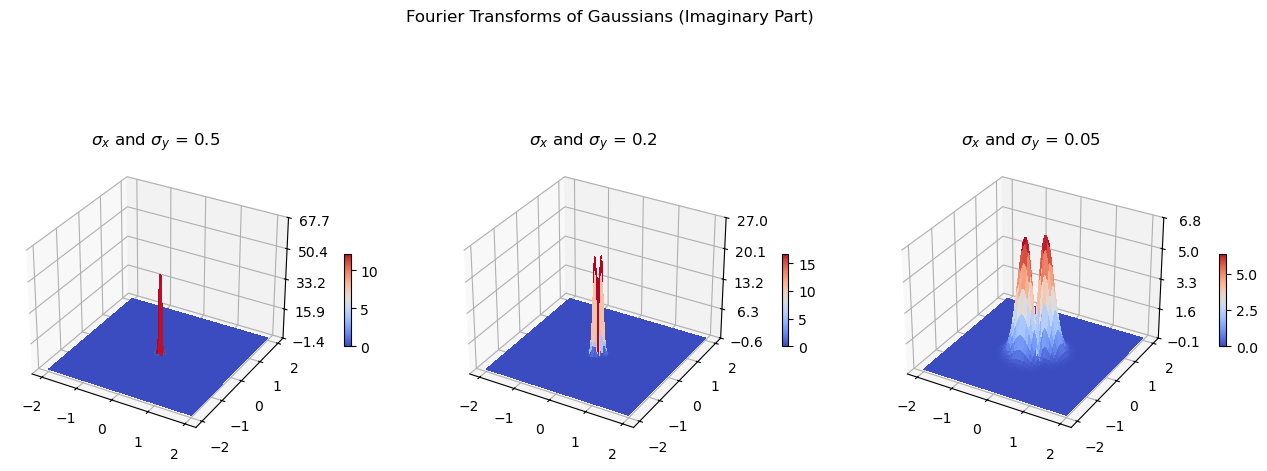

In [25]:
# Part of code borrowed from guide: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py 
# Plotting the (IMAGINARY) Fourier Transforms of the Guassians with various sigma in 3D 
fig, (s1ft, s2ft, s3ft) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize = (16, 6))

# I'm using np.abs so that the plot looks nicer and emphasizes the wideness and narrowness of the Gaussian rather than other factors

# Plot the surface for sigmas = 0.5
surf_s1ft_re = s1ft.plot_surface(x_mesh, y_mesh, np.abs(np.imag(s1_shift)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s1ft.set_title("$\sigma_x$ and $\sigma_y$ = 0.5")
s1ft.zaxis.set_major_locator(LinearLocator(5))
s1ft.zaxis.set_major_formatter('{x:0.1f}')
#g2.set_zlim(-0.0, 1.0)

# Plot the surface for sigmas = 0.2
surf_s2ft_re = s2ft.plot_surface(x_mesh, y_mesh, np.abs(np.imag(s2_shift)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s2ft.set_title("$\sigma_x$ and $\sigma_y$ = 0.2")
s2ft.zaxis.set_major_locator(LinearLocator(5))
s2ft.zaxis.set_major_formatter('{x:0.1f}')

# Plot the surface for sigmas = 0.05
surf_s3ft_re = s3ft.plot_surface(x_mesh, y_mesh, np.abs(np.imag(s3_shift)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s3ft.set_title("$\sigma_x$ and $\sigma_y$ = 0.05")
s3ft.zaxis.set_major_locator(LinearLocator(5))
s3ft.zaxis.set_major_formatter('{x:0.1f}')

# Add color bars which maps values to colors
fig.colorbar(surf_s1ft_re, ax = s1ft, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s2ft_re, ax = s2ft, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s3ft_re, ax = s3ft, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))

# Title
fig.suptitle('Fourier Transforms of Gaussians (Imaginary Part)')

plt.show()

**Analysis**\
It appears that as sigma decreases in both x and y, the Gaussian in the frequency domain appears to get wider, once again confirming the idea that as you get sharper data in one domain, it becomes wider in the other.

#### Now Reconstruct the Gaussians

In [26]:
# Now it's time to define a function to help turn the frequency data back into the original Gaussian
def InverseFourier2D(frequency_data):
    '''
    Takes in Fourier space data for the 2D Gaussian and outputs the original Gaussian in the spacial domain.

    Parameters:
    frequency_data - the data for the Gaussian stored as frequencies from using fft.
    '''
    
    spacial_data = np.fft.ifft2(frequency_data)

    return (spacial_data)

In [27]:
# Parameters (use raw data only)
(s1_raw, s1_shift) = FastFourier2D(s1_z_values)
(s2_raw, s2_shift) = FastFourier2D(s2_z_values)
(s3_raw, s3_shift) = FastFourier2D(s3_z_values)

In [28]:
# Generate Data
s1_spatial_data = InverseFourier2D(s1_raw)
s2_spatial_data = InverseFourier2D(s2_raw)
s3_spatial_data = InverseFourier2D(s3_raw)

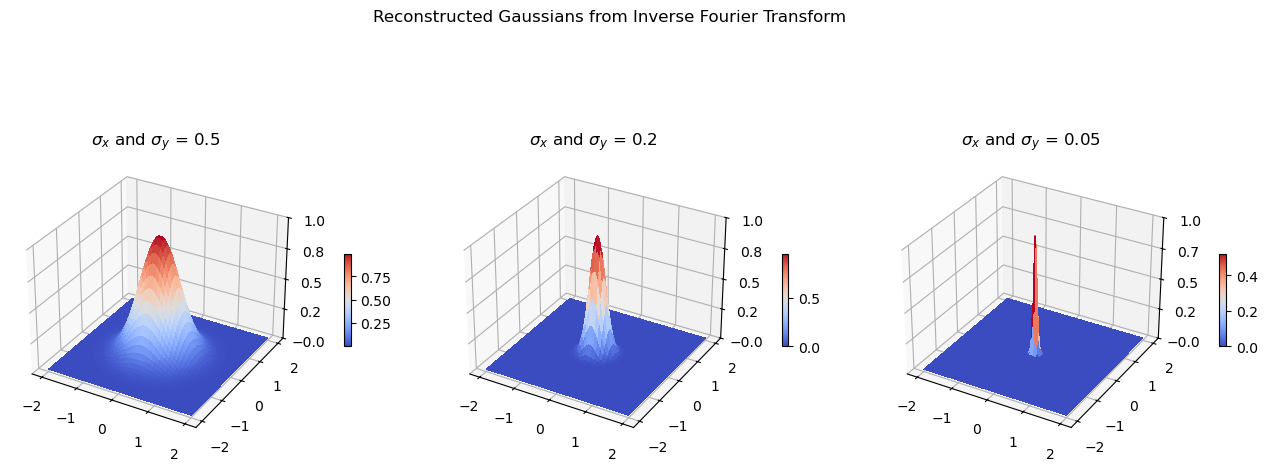

In [29]:
# Part of code borrowed from guide: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py 

# Plotting the reconstructed Guassians with various sigma in 3D
fig, (s1r, s2r, s3r) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize = (16, 6))

# Plot the surface for sigmas = 0.5
surf_s1r = s1r.plot_surface(x_mesh, y_mesh, np.real(s1_spatial_data), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s1r.set_title("$\sigma_x$ and $\sigma_y$ = 0.5")
s1r.zaxis.set_major_locator(LinearLocator(5))
s1r.zaxis.set_major_formatter('{x:0.1f}')
#g2.set_zlim(-0.0, 1.0)

# Plot the surface for sigmas = 0.2
surf_s2r = s2r.plot_surface(x_mesh, y_mesh, np.real(s2_spatial_data), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s2r.set_title("$\sigma_x$ and $\sigma_y$ = 0.2")
s2r.zaxis.set_major_locator(LinearLocator(5))
s2r.zaxis.set_major_formatter('{x:0.1f}')

# Plot the surface for sigmas = 0.05
surf_s3r = s3r.plot_surface(x_mesh, y_mesh, np.real(s3_spatial_data), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
s3r.set_title("$\sigma_x$ and $\sigma_y$ = 0.05")
s3r.zaxis.set_major_locator(LinearLocator(5))
s3r.zaxis.set_major_formatter('{x:0.1f}')

# Add color bars which maps values to colors
fig.colorbar(surf_s1r, ax = s1r, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s2r, ax = s2r, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))
fig.colorbar(surf_s3r, ax = s3r, shrink = 0.2, aspect = 14, anchor = (0.5, 0.5))

# Title
fig.suptitle('Reconstructed Gaussians from Inverse Fourier Transform')

plt.show()

**Reflection**\
I am now comfortable with turning 2D spatial data into frequency data with the Fast Fourier NumPy function and then reconstructing the original Gaussian using the Inverse Fast Fourier commands. I will now attempt to apply this same process to MRI data, which comes raw from the MRI scan in 2D k-space, or 2D frequency data. I will use only the inverse Fourier transform to reconstruct the MRI images, which is how these machines work. This is an application into the field of biomedical physics, and it is growing with techniques such as sodium-MRI, fMRI, and PET scans.

### Part 3 - Reconstructing Raw MRI Data

In [34]:
# Load the knee MRI scan file that is in k-space domain
# This file was made possible by birogeri from GitHub: https://github.com/birogeri/kspace-explorer/blob/master/README.md
MRI = np.load('knee.npy')

In [35]:
# Examine the file's shape.
np.shape(MRI)

(15, 640, 320)

**Analysis**\
The (15) indicates 15 pieces of 2D frequency data. The goal here is to convert these 15 slices of someone's knee's data into viewable MRI images.

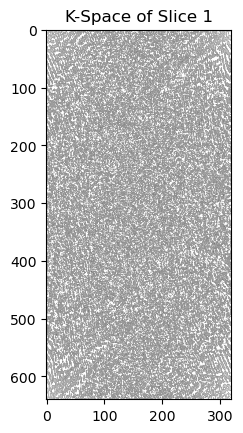

In [36]:
# Start by examining a single piece of data, the first slice
slice1 = np.fft.fftshift(MRI[0])

# Create an image to represent this raw k-space data, which is shifted for symmetry
# Herdman recommended me to use log normalization to address the problem of large differences causing lack of color 
plt.imshow(np.real(slice1), norm = 'log', cmap = 'gray') 
plt.title('K-Space of Slice 1')

plt.show()

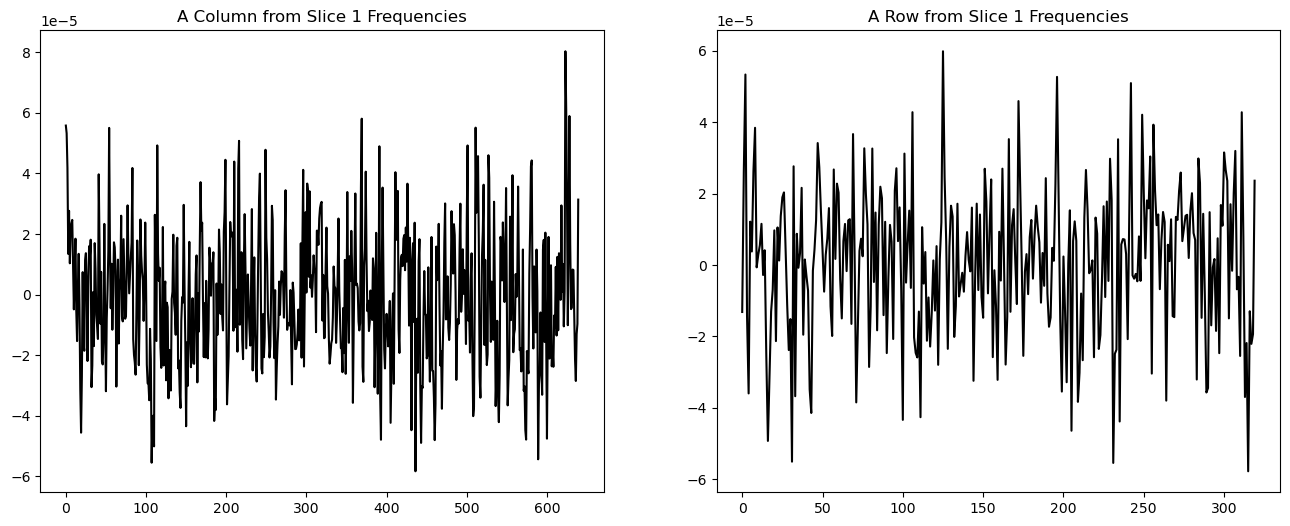

In [37]:
# Plot the k-space data of a single column and single row
fig, (col, row) = plt.subplots(1, 2, figsize = (16, 6))

col.plot(np.real(slice1[:,200]), color = 'k')
row.plot(np.real(slice1[200,:]), color = 'k')

# Style
col.set_title('A Column from Slice 1 Frequencies')
row.set_title('A Row from Slice 1 Frequencies')

plt.show()

#### Now reconstruct the slice from its k-space data

In [38]:
# Borrow this from Part 2
def InverseFourier2D(frequency_data):
    '''
    Takes in Fourier space data for the 2D Gaussian and outputs the original Gaussian in the spacial domain.

    Parameters:
    frequency_data - the data for the Gaussian stored as frequencies from using fft.
    '''
    
    spacial_data = np.fft.ifft2(frequency_data)

    return (spacial_data)

In [39]:
# Generate spatial domain data for this slice
slice1_recon = InverseFourier2D(slice1)

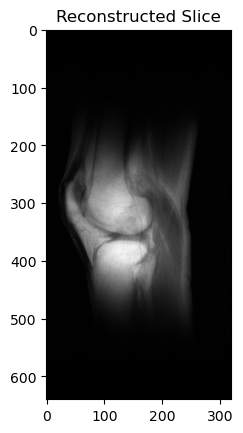

In [41]:
# Generate Image of Knee
data_abs = np.abs(slice1_recon)

# Use the shifted transform for symmetrical image composition
plt.imshow(np.fft.ifftshift(data_abs), cmap = 'gray')
plt.title('Reconstructed Slice')

plt.show()

**Success!** \
Now it is time to try and loop over the knee.npy file to reconstruct all images from the k-space data for each slice.

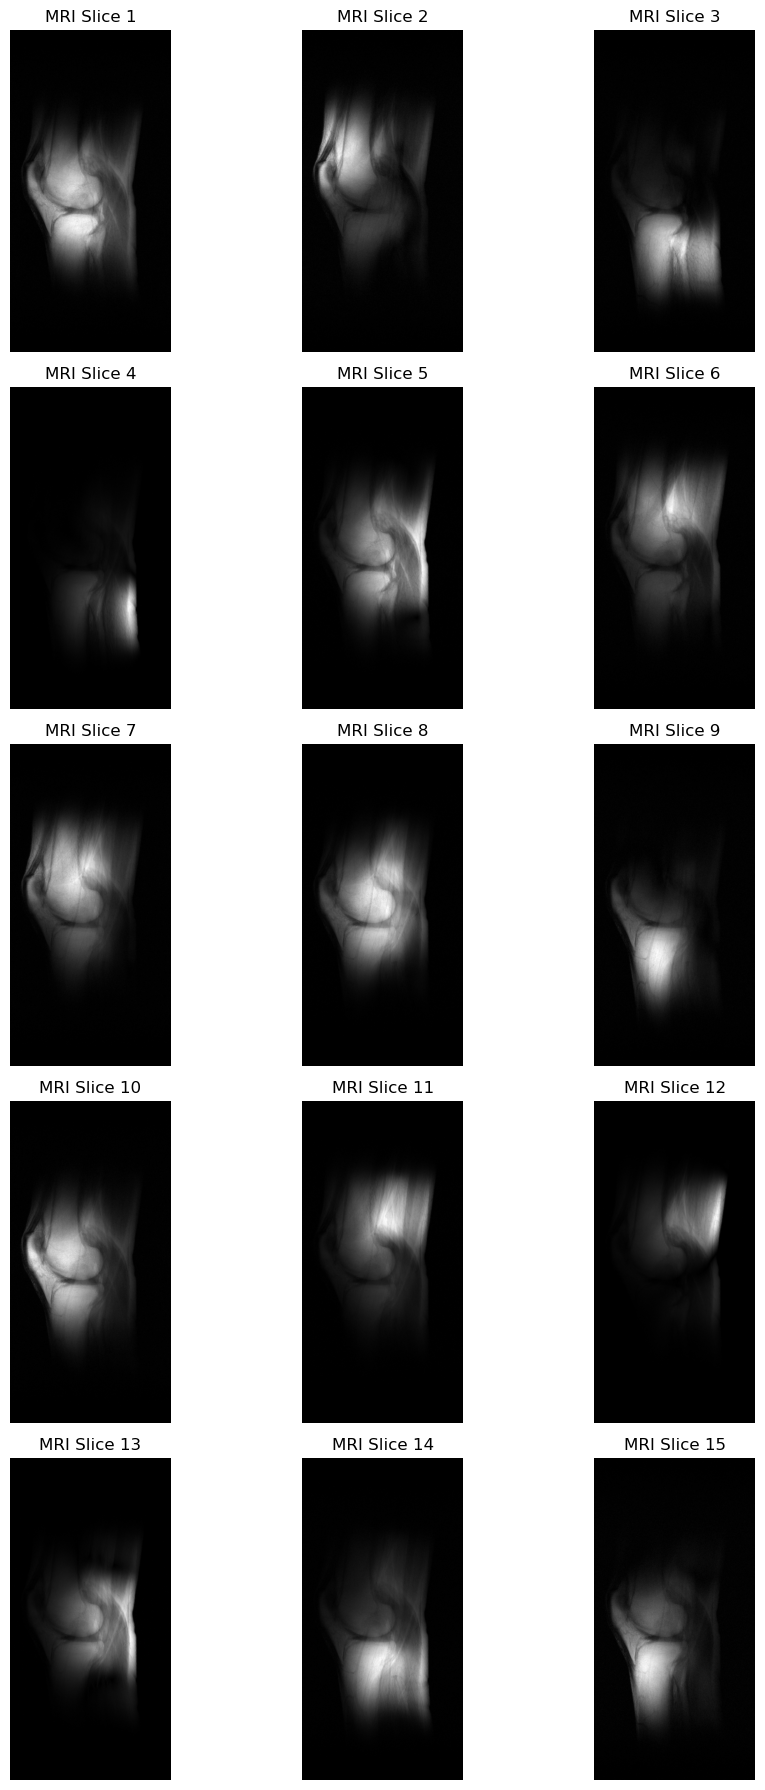

In [59]:
# Create figure
fig, scans = plt.subplots(nrows = 5, ncols = 3, figsize = (10, 18))
scans = scans.ravel()

# Loop over the first index of the MRI array 
for i in range(15):
    scans[i].imshow(np.fft.ifftshift(np.abs(InverseFourier2D(MRI[i]))), cmap = 'gray')
    scans[i].set_title(f'MRI Slice {i+1}')
    scans[i].axis('off')

plt.tight_layout()
plt.show()

### **Success!** - End of Project

#### References
https://www.princeton.edu/~cuff/ele201/kulkarni_text/frequency.pdf \
https://www.intel.com/content/www/us/en/developer/articles/technical/fast-fourier-transform-and-convolution-in-medical-image-reconstruction.html \
https://developer.nvidia.com/gpugems/gpugems2/part-vi-simulation-and-numerical-algorithms/chapter-48-medical-image-reconstruction

https://github.com/birogeri/kspace-explorer \
https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html 